In [884]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from keras_visualizer import visualizer
from IPython.core.display import Image, display
from scipy.stats import norm

Generate testing data
SINGLE INPUT TESTING DATA

In [660]:
t_start = 0
t_end = 10
t_steps = 10000
t_range = np.linspace(t_start,t_end,t_steps)
seq = np.array([np.sin(2*np.pi*t/10) for t in t_range])
#[print(num) for num in enumerate(seq)]
x_test = np.array(seq)
y_test = np.array(np.roll(seq, -1))

Generate training data, in order to create training data for predicting the next value of the sine function based on the current value, generate n pairs of two-point sequences from the values in seq.

SIGLE INPUT TRAINING DATA

In [676]:
n_training_data_pairs = 1000
x_train = np.array([])
y_train = np.array([])
for i in range(n_training_data_pairs):
    rand = np.random.randint(t_steps)
    x_train = np.append(x_train, seq[rand])
    y_train = np.append(y_train, seq[np.mod(rand + 1,t_steps)])

pdata = pd.DataFrame({'x':x_train,'y':y_train})
print(pdata)


            x         y
0    0.102872  0.103497
1   -0.736295 -0.735869
2   -0.455991 -0.456550
3    0.452352  0.452912
4    0.942508  0.942298
..        ...       ...
995  0.832918  0.832570
996  0.548809  0.548283
997  0.921502  0.921746
998  0.694387  0.693935
999 -0.687117 -0.687574

[1000 rows x 2 columns]


MULTIPLE INPUT testing data

In [897]:
t_start = 0
t_end = 10
t_steps = 10000
t_range = np.linspace(t_start,t_end,t_steps)
seq = np.array([np.sin(2*np.pi*t/10) for t in t_range])
#[print(num) for num in enumerate(seq)]
x_test1 = np.array(seq)
x_test2 = np.array(np.roll(seq, -1))
y_test = np.array(np.roll(seq, -2))
raw_test_data = []
for i in range(len(y_test)):
    element = [x_test1[i],x_test2[i], y_test[i]]
    raw_test_data.append(element)
column_names_test = ['x1','x2','y']
test_data = pd.DataFrame(raw_test_data, columns=column_names_test)
test_labels = test_data[['x1','x2']]
test_features = test_data[['y']]


MULTIPLE INPUT training data

In [898]:
n_training_data_pairs = 1000
x_train1 = np.array([])
x_train2 = np.array([])
y_train = np.array([])
raw_train_data = []
for i in range(n_training_data_pairs):
    rand = np.random.randint(t_steps)
    x_train1 = np.append(x_train1, seq[rand])
    x_train2 = np.append(x_train2, seq[np.mod(rand + 1,t_steps)])
    y_train = np.append(y_train, seq[np.mod(rand + 2,t_steps)])
    element = [x_train1[-1], x_train2[-1], y_train[-1]]
    raw_train_data.append(element)
column_names = ['x1','x2','y']
train_data = pd.DataFrame(raw_train_data, columns=column_names)
train_labels = train_data[['x1','x2']]
train_features = train_data[['y']]
print(train_data)

           x1        x2         y
0    0.554574  0.554051  0.553528
1    0.678394  0.677932  0.677470
2    0.415272  0.414700  0.414129
3    0.349096  0.348507  0.347918
4   -0.532156 -0.531623 -0.531091
..        ...       ...       ...
995 -0.506110 -0.506652 -0.507193
996 -0.345561 -0.346150 -0.346740
997  0.986607  0.986709  0.986811
998 -0.695065 -0.694613 -0.694161
999 -0.860315 -0.860635 -0.860955

[1000 rows x 3 columns]


Scatterplot of training data

In [698]:
plt.scatter(pdata['x'],pdata['y'], color='xkcd:blue', marker='o', label='training data')
plt.title('Training data')
plt.legend()
plt.show()

KeyError: 'x'

Create model, SINGLE INPUT

In [678]:
def build_model(loss, optimizer,metrics,n_inputs,n_nodes):
    model = keras.Sequential([
        layers.Dense(n_nodes, activation='relu', input_shape=[n_inputs]),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
    return model
loss = 'mse'
optimizer = 'adam'
metrics=['accuracy']
n_inputs = 1
n_nodes = 20
model = build_model(loss,optimizer,metrics,n_inputs,n_nodes)
n_hidden_layers = len(model.layers)-1

Create model, MULTIPLE INPUTS

In [899]:
def build_model(loss, optimizer,metrics,n_inputs,n_nodes):
    model = keras.Sequential([
        layers.Dense(n_nodes, activation='relu', input_shape=[n_inputs]),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(n_nodes, activation='relu'),
        layers.Dense(1)
    ])
    model.compile(loss=loss,
                optimizer=optimizer,
                metrics=metrics)
    return model
loss = 'mse'
optimizer = 'adam'
metrics=['accuracy']
n_inputs = 2
n_nodes = 500
model = build_model(loss,optimizer,metrics,n_inputs,n_nodes)
n_hidden_layers = len(model.layers)-1


Visualize model

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_206 (Dense)            (None, 500)               1500      
_________________________________________________________________
dense_207 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_208 (Dense)            (None, 500)               250500    
_________________________________________________________________
dense_209 (Dense)            (None, 1)                 501       
Total params: 503,001
Trainable params: 503,001
Non-trainable params: 0
_________________________________________________________________


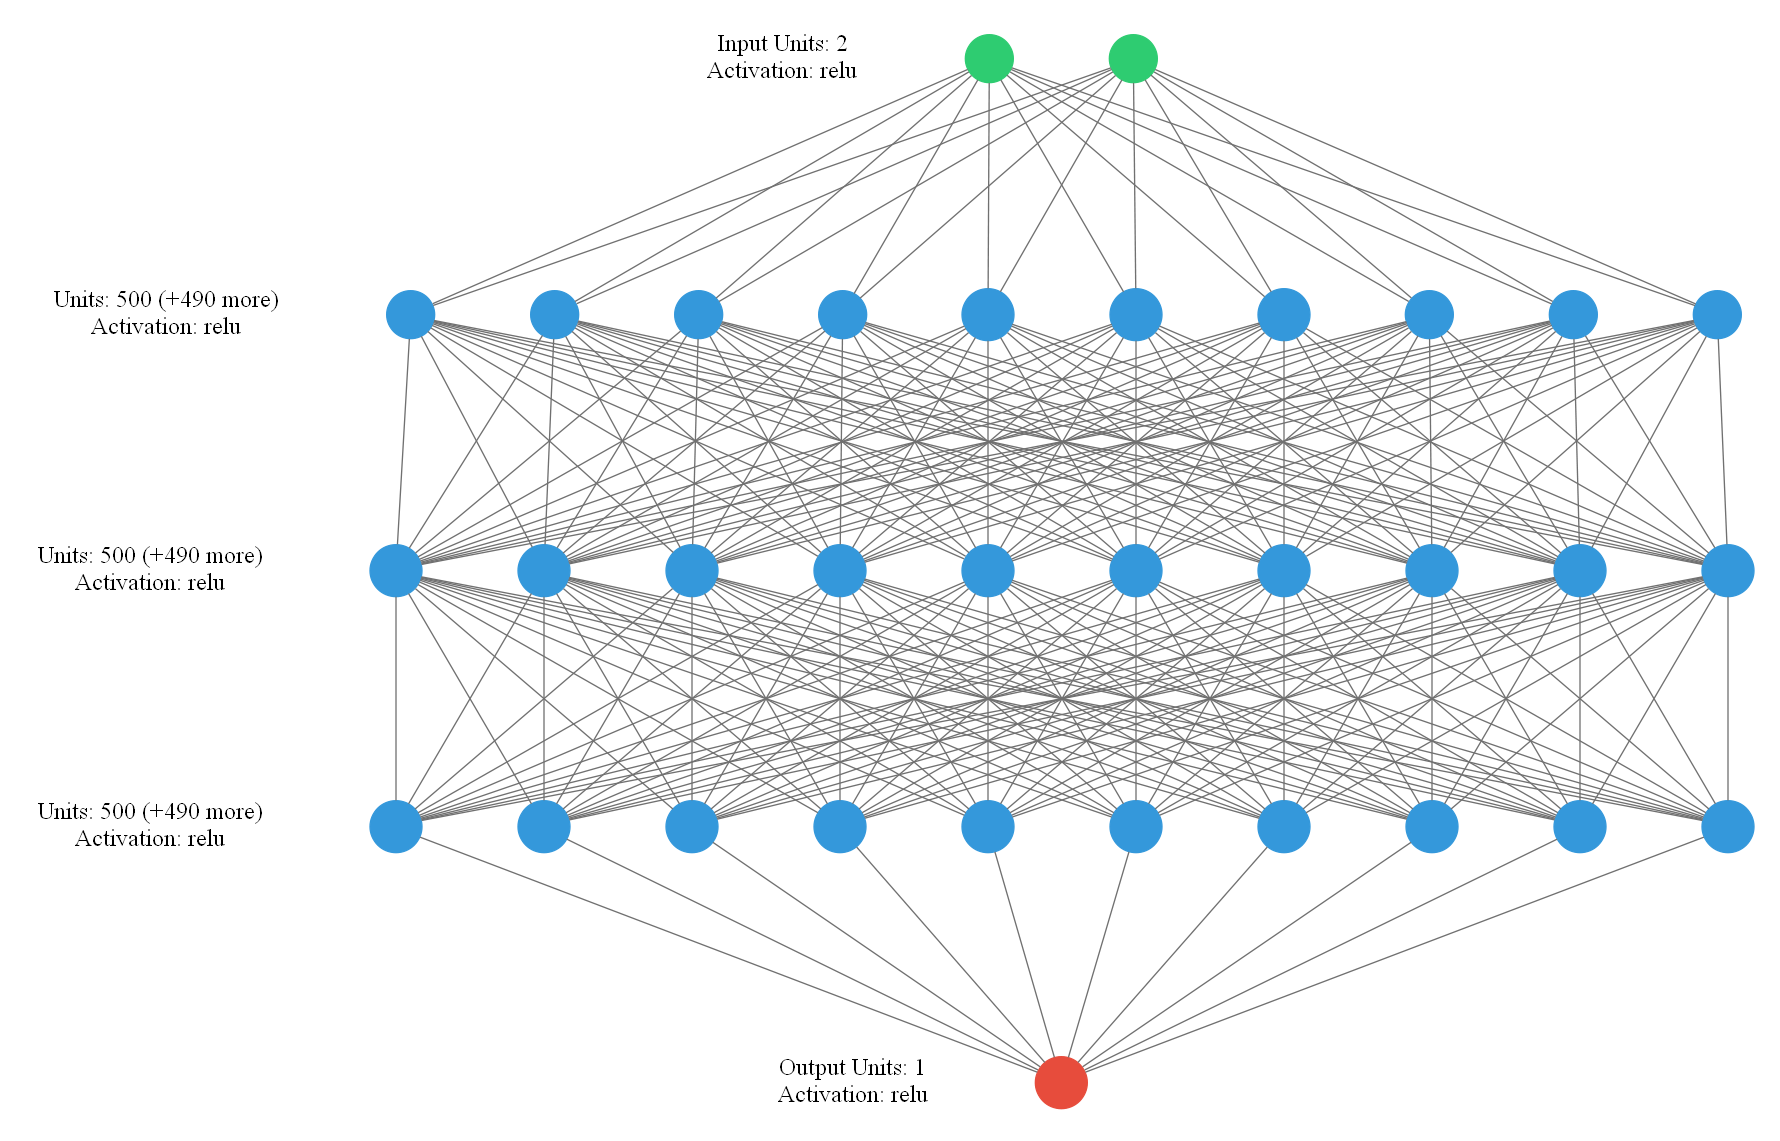

In [900]:
model.summary()
visualizer(model,format='png')
display((Image(filename='graph.png')))

Set up early stop

In [901]:
%%time
min_delta_value = 0.000
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,
    min_delta=min_delta_value,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

Wall time: 0 ns


In [841]:
val_split = 0.2
epochs = 1000
batch_size = 100
history = model.fit(x_train, y_train, validation_split=val_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stop])

ValueError: Training data contains 0 samples, which is not sufficient to split it into a validation and training set as specified by `validation_split=0.2`. Either provide more data, or a different value for the `validation_split` argument.

 Train model DOUBLE INPUT

In [902]:
val_split = 0.2
epochs = 1000
batch_size = 100
history = model.fit(train_data[[column_names[0], column_names[1]]].to_numpy(),train_data[[column_names[2]]].to_numpy(), validation_split=val_split, epochs=epochs, batch_size=batch_size,callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 0s 30ms/step - loss: 0.1358 - accuracy: 0.0000e+00 - val_loss: 0.0098 - val_accuracy: 0.0000e+00
Epoch 2/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0117 - accuracy: 0.0000e+00 - val_loss: 0.0024 - val_accuracy: 0.0000e+00
Epoch 3/1000
8/8 [==============================] - 0s 11ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 6.1337e-04 - val_accuracy: 0.0000e+00
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 0.0018 - accuracy: 0.0000e+00 - val_loss: 5.5705e-04 - val_accuracy: 0.0000e+00
Epoch 5/1000
8/8 [==============================] - 0s 11ms/step - loss: 7.0562e-04 - accuracy: 0.0000e+00 - val_loss: 5.0917e-04 - val_accuracy: 0.0000e+00
Epoch 6/1000
8/8 [==============================] - 0s 15ms/step - loss: 2.6710e-04 - accuracy: 0.0000e+00 - val_loss: 2.2441e-04 - val_accuracy: 0.0000e+00
Epoch 7/1000
8/8 [==============================] - 0s 13ms/step - loss: 1.0851e-0

8/8 [==============================] - 0s 13ms/step - loss: 4.3713e-07 - accuracy: 0.0000e+00 - val_loss: 4.6078e-07 - val_accuracy: 0.0000e+00
Epoch 54/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.3677e-07 - accuracy: 0.0000e+00 - val_loss: 4.4522e-07 - val_accuracy: 0.0000e+00
Epoch 55/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.3114e-07 - accuracy: 0.0000e+00 - val_loss: 4.5421e-07 - val_accuracy: 0.0000e+00
Epoch 56/1000
8/8 [==============================] - 0s 10ms/step - loss: 4.2075e-07 - accuracy: 0.0000e+00 - val_loss: 4.7241e-07 - val_accuracy: 0.0000e+00
Epoch 57/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.2860e-07 - accuracy: 0.0000e+00 - val_loss: 4.6501e-07 - val_accuracy: 0.0000e+00
Epoch 58/1000
8/8 [==============================] - 0s 11ms/step - loss: 4.2127e-07 - accuracy: 0.0000e+00 - val_loss: 4.5410e-07 - val_accuracy: 0.0000e+00
Epoch 59/1000
8/8 [==============================] - 0s 11ms/step 

Review the training progress and performance, View the model's (historical) training progress via the history object

In [903]:
n_epochs = len(history.history['loss'])
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
55,4.207464e-07,0.0,4.724092e-07,0.0,55
56,4.285980e-07,0.0,4.650055e-07,0.0,56
57,4.212691e-07,0.0,4.540993e-07,0.0,57
58,4.275410e-07,0.0,4.614109e-07,0.0,58
59,4.430101e-07,0.0,4.780011e-07,0.0,59


Plot training history

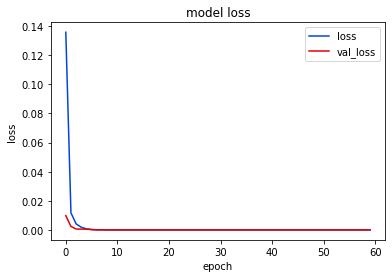

In [904]:
plt.plot(history.history['loss'], color='xkcd:blue')
plt.plot(history.history['val_loss'], color='xkcd:red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()

Predict values using data in the test set, Plot scatter of predictions vs test

In [905]:
y_pred = model.predict(x_test, batch_size=10).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred, color='blue')
_ = plt.plot([-2,2], [-2,2], color='xkcd:light grey')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

ValueError: in user code:

    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_58 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [10, 1]


Visualize the predicted value versus the training (ie. true) values.

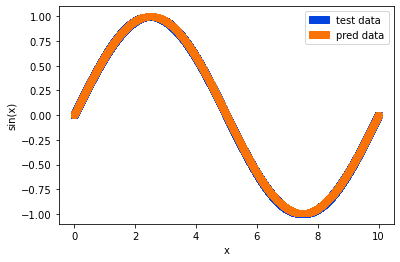

In [906]:
plot_test = plt.plot(t_range, y_test,'x-', color='xkcd:blue', label='y_test')
plot_pred = plt.plot(t_range,y_pred,'o', color='xkcd:orange', label='y_pred')
plt.xlabel('x')
plt.ylabel('sin(x)')
test_patch = mpatches.Patch(color='xkcd:blue', label='test data')
pred_patch = mpatches.Patch(color='xkcd:orange', label='pred data')
plt.legend(handles = [test_patch, pred_patch])
plt.show()

Take a look at the error distribution.

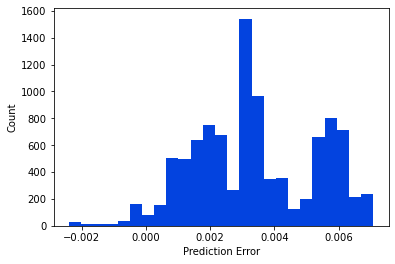

In [907]:
error = y_pred - y_test
plt.hist(error, bins = 25, color='xkcd:blue')
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")
plt.show()

Print results for comparison SINGLE INPUT

In [908]:
summary_run = {}
summary_run['hyperparameter'] = [t_steps, n_training_data_pairs,epochs,n_epochs,batch_size,n_hidden_layers,n_nodes,n_inputs,model.evaluate(
    np.asarray(x_test),
    np.asarray(y_test),
    verbose=0)[0]]
pd.DataFrame(summary_run,index = ['# time steps','# training pairs','# epochs','# epochs convergence','batch size','# hidden layers','# nodes per layer','# inputs','mse']).transpose()

ValueError: in user code:

    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1224 test_function  *
        return step_function(self, iterator)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1215 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1208 run_step  **
        outputs = model.test_step(data)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\training.py:1174 test_step
        y_pred = self(x, training=False)
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\loren\miniconda3\envs\specialtopics\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_58 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape [None, 1]


In [691]:
summary_run = {}
summary_run['hyperparameter'] = [min_delta_value,loss,optimizer, metrics,val_split,model.evaluate(
    np.asarray(x_test),
    np.asarray(y_test),
    verbose=0)[0]]
pd.DataFrame(summary_run,index = ['min delta','loss','optimizer','metrics','val_split','mse']).transpose()

,min delta,loss,optimizer,metrics,val_split,mse
hyperparameter,0.0,mse,adam,[accuracy],0.2,0.000014


Print results for comparison DOUBLE INPUT

In [909]:
summary_run = {}
summary_run['hyperparameter'] = [t_steps, n_training_data_pairs,epochs,n_epochs,batch_size,n_hidden_layers,n_nodes,n_inputs,
                                 model.evaluate(test_data[[column_names_test[0], column_names_test[1]]].to_numpy(),test_data[[column_names_test[2]]].to_numpy(),verbose=0)[0]]
pd.DataFrame(summary_run,index = ['# time steps','# training pairs','# epochs','# epochs convergence','batch size','# hidden layers','# nodes per layer','# inputs','mse']).transpose()

,# time steps,# training pairs,# epochs,# epochs convergence,batch size,# hidden layers,# nodes per layer,# inputs,mse
hyperparameter,10000.0,1000.0,1000.0,60.0,100.0,3.0,500.0,2.0,4.814593e-07


In [910]:
summary_run = {}
summary_run['hyperparameter'] = [min_delta_value,loss,optimizer, metrics,val_split,
                                 model.evaluate(test_data[[column_names_test[0], column_names_test[1]]].to_numpy(),test_data[[column_names_test[2]]].to_numpy(),verbose=0)[0]]
pd.DataFrame(summary_run,index = ['min delta','loss','optimizer','metrics','val_split','mse']).transpose()

,min delta,loss,optimizer,metrics,val_split,mse
hyperparameter,0.0,mse,adam,[accuracy],0.2,0.0
